In [1933]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, interp2d
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from IPython.display import display, clear_output
import time
import scipy as scipy
import csv
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn.decomposition import PCA

In [425]:
def ER_import(stoch_base_ER):
    read_in = open('import_dates.csv')
    myreader = csv.reader(read_in)
    
    for row in myreader:
        mat_gen_dates = row[:]
    
    ERs = np.genfromtxt('ER_list_' + str(stoch_base_ER) + '_' + str(mat_gen_dates[-1]) + '.csv',
                                  delimiter = ',')
        
    return ERs

In [395]:
def CN_stoch_in_fxn(ERs_all):
    CN_import = np.empty((total_time, 4, scenarios))
    for i in range(scenarios):
        CN_import[:,:3,i] = np.genfromtxt('STO_C14_Be10_ER' + str(ERs_all[i]) + '_expmat.csv', 
                                          delimiter = ',')

        CN_import[:,3,i] = np.genfromtxt('STO_He3_ER' + str(ERs_all[i]) + '_surfmat.csv',
                              delimiter = ',')
        
    return CN_import

In [488]:
def sampling_fxn(CN_import_matrix, sample_no, scenarios):
    P0_Be10 = SLHL_Be10 * scaling_factor
    P0_He3 = SLHL_Be10 * scaling_factor
    sampling_years = np.sort(np.random.choice(np.arange(int(total_time * 0.1),total_time),sample_no))
    sampling_mat = np.empty((sample_no, 6, scenarios))
    measured = np.empty((6,scenarios))
    
    for j in range(scenarios):
        
        sampling_14C = []
        sampling_Be = []
        sampling_rat = []
        sampling_3He = []
    
        for i in range(sample_no):           

            sampling_14C.append(CN_import_matrix[sampling_years[i],0,j])
            sampling_Be.append(CN_import_matrix[sampling_years[i],1,j])
            sampling_rat.append(CN_import_matrix[sampling_years[i],2,j])
            sampling_3He.append(CN_import_matrix[sampling_years[i],3,j])
        
        sampling_mat[:,0,j] = sampling_14C
        sampling_mat[:,1,j] = sampling_Be
        sampling_mat[:,2,j] = sampling_rat
        sampling_mat[:,3,j] = sampling_3He
        sampling_mat[:,4,j] = np.divide(sampling_3He,sampling_Be) * (P0_Be10 / P0_He3)
        sampling_mat[:,5,j] = sampling_years
        
        
        measured[0,j] = np.mean(sampling_mat[:,0,j])
        measured[1,j] = np.mean(sampling_mat[:,1,j])
        measured[2,j] = measured[0,j] / measured[1,j]
        measured[3,j] = np.mean(sampling_mat[:,3,j])
        measured[4,j] = (np.mean(sampling_mat[:,4,j]) / np.mean(sampling_mat[:,1])) * (P0_Be10 / P0_He3)
        measured[5,j] = (160 / 2.62 * P0_Be10 / measured[1,j])
    
    measured_ER = [(160 / 2.62 * P0_Be10 / measured[1,j]) for j in range(scenarios)]
    
    return sampling_mat, measured, measured_ER  

In [423]:
# master2 = np.empty((total_time, 11, scenarios))
# samples2 = np.empty((sample_no, 6, scenarios))

# for i in range(scenarios):
#     master2[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(ERs_25[i]) + '.csv',  
#                                   delimiter = ',')
#     samples2[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(ERs_25[i]) + '.csv',
#                                   delimiter = ',')
#     measured2 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(ERs_25)) + '.csv',
#                             delimiter = ',')
#     master_means2 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(ERs_25)) + '.csv',  
#                                     delimiter = ',')

In [426]:
# ERs_05 = ER_import(0.05)

In [428]:
# master05 = np.empty((total_time, 11, scenarios))
# samples05 = np.empty((sample_no, 6, scenarios))

# for i in range(scenarios):
#     master05[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(ERs_05[i]) + '.csv',  
#                                   delimiter = ',')
#     samples05[:,:,i] = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(ERs_05[i]) + '.csv',
#                                   delimiter = ',')
#     measured05 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(ERs_05)) + '.csv',
#                             delimiter = ',')
#     master_means05 = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/all_year_means_output_' + str(np.mean(ERs_05)) + '.csv',  
#                                     delimiter = ',')

In [247]:
# master_means = [[np.mean(master_array[2500:,i,j]) for j in range(scenarios)] for i in range(11)]

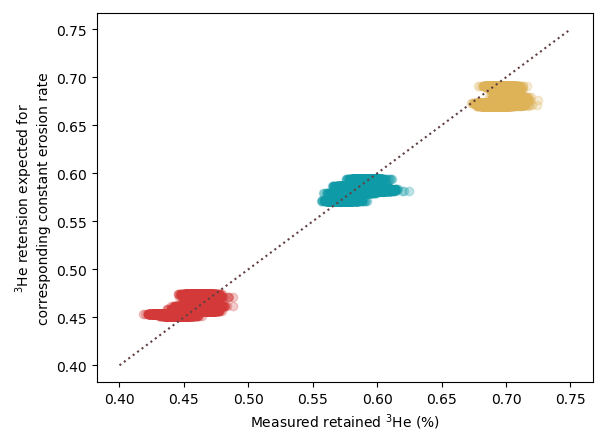

In [2512]:
[plt.scatter(measured_perc_1000[0][k][:], actual_means_list[0][10,:], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[plt.scatter(measured_perc_1000[1][k][:], actual_means_list[1][10], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[plt.scatter(measured_perc_1000[2][k][:], actual_means_list[2][10],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
plt.plot([0.4,0.75],[0.4,0.75], c = '#634042', ls = 'dotted')
plt.xlabel('Measured retained $^{3}$He (%)')
plt.ylabel('$^{3}$He retension expected for \ncorresponding constant erosion rate')
plt.savefig('He3_retension_measured_vs_expected.png', bbox_inches = 'tight',
            transparent = True)
plt.savefig('He3_retension_measured_vs_expected.jpg',
           bbox_inches = 'tight')

In [1967]:
# # Set the lists up of all the imported data

# master_list = [master05, master_array, master2]
# samples_list = [samples05, samples_array, samples2]
# measured_list = [measured05, sampling_array, measured2]
# actual_means_list = [master_means05, master_means, master_means2]
# actual_ERs = [[np.sum(master_list[k][2500:, 5, i]) / 22500 for i in range(scenarios)] for k in range(3)]
# measured_ER = [[(160 / 2.62 * P0_Be10 / measured_list[k][1,j]) for j in range(scenarios)] for k in range(3)]
# scaled_C14_error = [[(measured_list[j][2,i] / measured_list[j][k,i]) - actual_means_list[j][8][i] for i in range(scenarios)] for j in range(3)] 
# C14_error = [[measured_list[l][2,i] - actual_means_list[l][8][j] for j in range(scenarios)] for l in range(3)] 

In [897]:
def CN_ax_plot(samples_array, master_array, ax, run, nuclide):
    
    if nuclide == 'He':
        ax.scatter(samples_array[:,5,run],(np.divide(samples_array[:,3,run], samples_array[:,1,run]) * (P0_Be10 / P0_He3)), 
                   color = '#8a4b36',
                   s = 10)
        ax.plot(master_array[:,4,run], lw = 1, color = '#e06f45')
        ax.plot(master_array[:,10,run], lw = 1, color = '#CC653F')
        ax.set_ylabel('$^{3}$He Retained (%)', size = 12, color = 'black')
        ax.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')
        ax.set_ylim(0,1.0)
        
    if nuclide == 'Be':
        ax.scatter(samples_array[:,5,run], samples_array[:,1,run], 
                   color = '#c48c36',
                  s = 10)
        ax.plot(master_array[:,1,run], lw = 1, color = '#deb256')
        ax.plot(master_array[:,7,run], lw = 1, color = '#CCA550')
        ax.set_ylabel('$^{10}$Be Conc (atoms$^{-1}$ g$^{-1}$)', size = 12, color = 'black')
        ax.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')
        ax.set_ylim(0,1.15 * np.max(master_array[:,1,run]))
        
    if nuclide == 'C':
        ax.scatter(samples_array[:,5,run], samples_array[:,0,run], color = '#315451',
                  s = 10)
        ax.plot(master_array[:,0,run], lw = 1, color = '#327c9f')
        ax.plot(master_array[:,6,run], lw = 1, color = '#3F9FCC')
        ax.set_ylabel('$^{14}$C Conc (atoms$^{-1}$ g$^{-1}$)', size = 12, color = 'black')
        ax.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')
        ax.set_ylim(0,1.15 * np.max(master_array[:,0,run]))
    
    if nuclide == 'ratio':
        ax.scatter(samples_array[:,5,run], samples_array[:,2,run], color = '#4a613a',
                  s = 10)
        ax.plot(master_array[:,2,run], lw = 1, color = '#78ab63')
        ax.plot(master_array[:,8,run], lw = 1, color = '#90CC76')
        ax.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')
        ax.set_ylabel('$^{14}$C / $^{10}$Be Ratio', size = 12, color = 'black')
        ax.set_ylim(0,1.15 * np.max(master_array[:,2,run]))

    return ax

In [2538]:
def run_plot(samples_array, master_array, run, save):
    
    jtplot.reset()
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, 
                                                 figsize = (9,8), 
                                                 sharex = True,
                                                 tight_layout = True)
    ax1.text(5000, 0.8, 'Mean Annual Temp. : 0C \nErosion Rates: 0.05 +/- 10% cm yr$^{-1}$')
    axes = [ax1, ax2, ax3, ax4]
    nuclides = ['He', 'Be', 'ratio', 'C']
    axes = [CN_ax_plot(samples_array, master_array, axes[x], run, nuclides[x]) for x in range(len(axes))]
    fig.text(0.5, 0.0, 'Time (years)', ha='center', va='center')
    fig.text(0.5, 1.0, 'Cosmogenic nuclide temporal evolution', ha = 'center', va = 'center')
    
    
    if save == True:
        plt.savefig('CN_evolution_0.05_runall.png', bbox_inches = 'tight',
           transparent = True)
        plt.savefig('CN_evolution_0.05_runall.jpg', bbox_inches = 'tight',)
    
    return fig.show()

C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



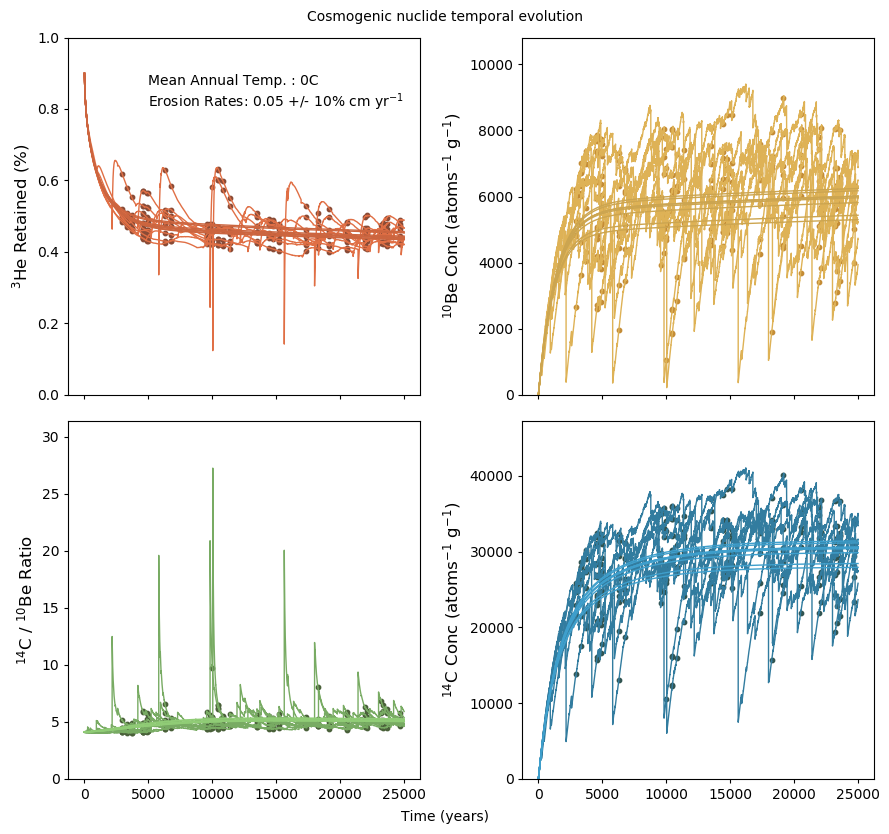

In [2539]:
run_plot(samples_list[0], master_list[0], run, True)

In [513]:
# sampling_1000 = [[sampling_fxn(master_list[k], sample_no, scenarios)[1] for i in range(1000)] for k in range(3)]  

In [1143]:
# Calculate for 1000x sampling

# C14_error_1000 = [[[sampling_1000[l][k][2,j] - actual_means_list[l][8][j] for j in range(scenarios)] for k in range(1000)] for l in range(3)]
# measured_ER_1000 = [[[(160 / 2.62 * P0_Be10 / sampling_1000[l][k][1,j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]
# ER_error_1000 = [[[actual_ERs[l][j] - measured_ER_1000[l][k][j] for j in range(scenarios)] for k in range(1000)] for l in range(3)]

# measured_perc_1000 = [[[(np.divide(sampling_1000[l][k][3,j],sampling_1000[l][k][1,j]) * (P0_Be10 / P0_He3))  for j in range(scenarios)] for k in range(1000)] for l in range(3)]


In [1227]:
'''
Concatenating some of our data for regular (single) linear regressions.
'''

data = []
other_data = []

[[[data.append(ER_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  
[[[other_data.append(C14_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  

reg_ER_correction_x = [0] * 3
reg_ER_correction_y = [0] * 3

for l in range(3):
    outx = []
    outy = []
    [[outx.append(ER_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)]
    [[outy.append(C14_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)]
    reg_ER_correction_x[l] = outx
    reg_ER_correction_y[l] = outy

# non_lin = np.polyfit(other_data, [abs(data[i]) for i in range(len(data))], 3)
regress = [scipy.stats.linregress(reg_ER_correction_y[l], reg_ER_correction_x[l]) for l in range(3)]
all_dat_reg = scipy.stats.linregress(other_data, data)

regx = np.arange(-1.1, 0.5, 0.1)
regy = [regress[l][0] * regx + regress[l][1] for l in range(3)]
all_reg_y = (all_dat_reg[0] * regx) + all_dat_reg[1]

In [2000]:
# [[actual_ERs_pca_list.append([actual_ERs[l][j]] * 1000) for j in range(scenarios)] for l in range(3)]

In [2209]:
'''
Compiling a matrix of 1D objects to perform multiple linear regression or principal 
components analyis.
'''

actual_ERs_pca_list = []
measured_ER_pca_list = []
ER_error_pca_list = []
C14_error_pca_list = []
C14_rat_pca_list = []

actual_ERs_pca_list = np.concatenate([np.concatenate([[actual_ERs[l][j]] * 1000 for j in range(scenarios)]) for l in range(3)]) 
[[[measured_ER_pca_list.append(measured_ER_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  
[[[ER_error_pca_list.append(ER_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  
[[[C14_error_pca_list.append(C14_error_1000[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  
[[[C14_rat_pca_list.append(sampling_1000[l][k][2,j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]

pca_mat = np.empty((30000,5))
pca_mat[:,4] = actual_ERs_pca_list
pca_mat[:,1] = measured_ER_pca_list
pca_mat[:,3] = ER_error_pca_list
pca_mat[:,2] = C14_error_pca_list
pca_mat[:,0] = C14_rat_pca_list

[[[None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None,

In [2208]:
'''
Define the linear regression model. Here it is based on the measured ER and the difference between the
measured 14C/10Be ratio and the expected 14C/10Be ratio for constant erosion given the _measured_ (i.e.
not the actual) erosion rate.

This allows us to use only measured information to reconstruct the actual (total lost / total time)
erosion rate.
'''

X = pca_mat[:,1:3]
y = pca_mat[:,4]
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X) # first predictions based on the original dataset that trained the model.
print('coefficients: ' + str(lm.coef_), 'intercept: ' + str(lm.intercept_))

coefficients: [ 1.32753201 -0.04759806] intercept: -0.013871038379593276


In [2203]:
'''
Splitting the concatenated lists back into component lsits of matrices for plotting.
'''

def split_list(alist, wanted_parts = 30):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

split_predicts = split_list(abs(predictions - first_actual_ERs_list), 30)
prediction_mean_error = np.mean(split_predicts,1)

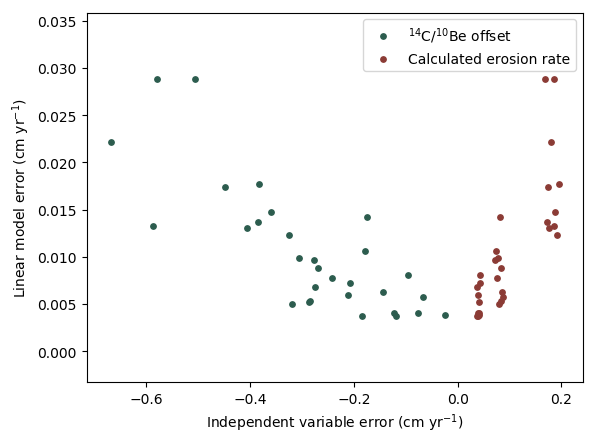

In [2452]:
plt.ylabel('Linear model error (cm yr$^{-1}$)')
plt.xlabel('Independent variable error (cm yr$^{-1}$)')
plt.scatter(np.mean(C14_error_1000,1), prediction_mean_error,
           c = '#2c5c4e', s = 15, label = '$^{14}$C/$^{10}$Be offset')
plt.scatter(np.mean(measured_ER_1000,1), prediction_mean_error,
           c = '#8b3b35', s = 15, label = 'Calculated erosion rate')
plt.legend()

plt.savefig('D:/STEIN_paper/model_outputs/figures/independent_variable_predictor_errors.png', bbox_inches = 'tight',
            transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/independent_variable_predictor_errors.jpg',
           bbox_inches = 'tight')

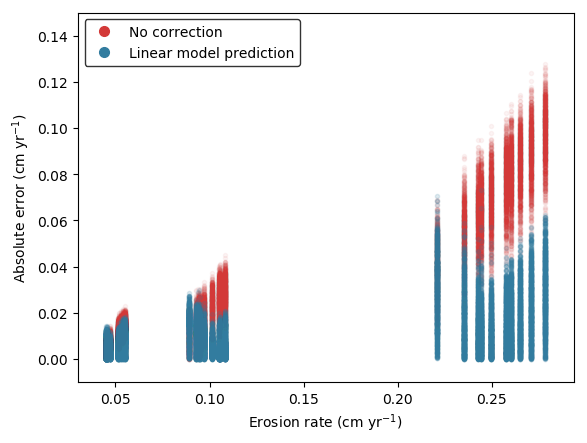

In [2371]:
plt.ylabel('Absolute error (cm yr$^{-1}$)')
plt.xlabel('Erosion rate (cm yr$^{-1}$)')
plt.scatter(actual_ERs_pca_list, abs(measured_ER_pca_list - first_actual_ERs_list),
           c = '#d33938', s = 9, alpha = 0.05, label = 'No correction')
plt.scatter(actual_ERs_pca_list, abs(predictions - first_actual_ERs_list), 
            alpha = 0.15, c = '#327c9f', s = 9, label = 'Linear model')
plt.ylim(-0.01,0.15)
colors = ['#d33938','#327c9f']
texts = ['No correction', 'Linear model prediction']
patches = [ ax1.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, edgecolor = 'black')
plt.savefig('D:/STEIN_paper/model_outputs/figures/lm_corrections_and_no_corrections.png', bbox_inches = 'tight',
            transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/lm_corrections_and_no_corrections.jpg',
           bbox_inches = 'tight')


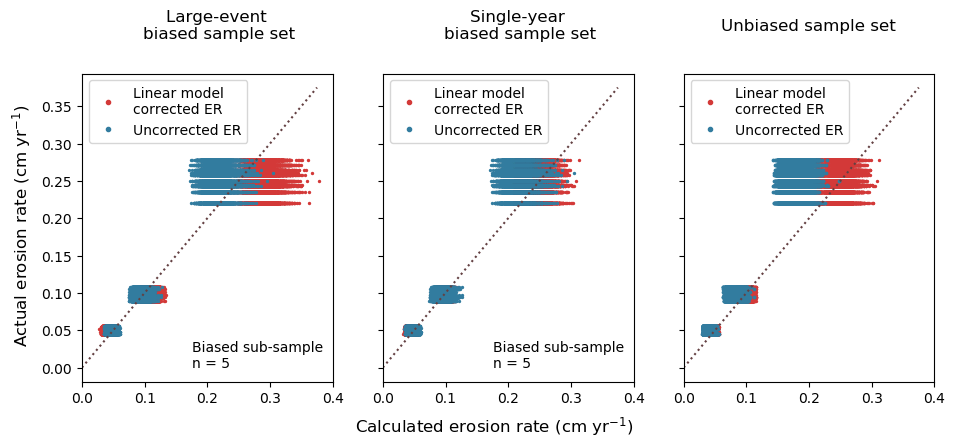

In [2519]:
bias_predict_lm_array = lm_predict_concat(bias_measured_ER, bias_C14_error)
bias_predict = lm.predict(bias_predict_lm_array)
rd_yr_bias_predict_lm_array = lm_predict_concat(rd_yr_bias_measured_ER, rd_yr_bias_C14_error)
rd_yr_bias_predict = lm.predict(rd_yr_bias_predict_lm_array)

fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, nrows = 1,
                             figsize = (11,4), sharey = True)
ax1.scatter(bias_predict, actual_ERs_pca_list,
            c = '#d33938',s = 2)
ax1.scatter(bias_measured_ER, actual_ERs_pca_list,
            c = '#327c9f', s = 2)
ax1.plot([0.0,0.375],[0.0,0.375], c = '#634042', ls = 'dotted')
ax1.text(0.175, 0.0, 'Biased sub-sample \nn = 5')

ax1.set_xlim(0.0,0.4)

colors = ['#d33938','#327c9f']
texts = ['Linear model \ncorrected ER', 'Uncorrected ER']
patches = [ ax1.plot([],[], marker="o", ms = 3, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax1.legend(handles=patches)

ax2.scatter(rd_yr_bias_predict, actual_ERs_pca_list,
            c = '#d33938',s = 2)
ax2.scatter(bias_measured_ER, actual_ERs_pca_list,
            c = '#327c9f', s = 2)
ax2.plot([0.0,0.375],[0.0,0.375], c = '#634042', ls = 'dotted')
ax2.set_xlim(0.0,0.4)
ax2.text(0.175, 0.0, 'Biased sub-sample \nn = 5')
ax2.legend(handles=patches)

ax3.scatter(rd_yr_bias_predict, actual_ERs_pca_list,
            c = '#d33938', s = 2)
ax3.scatter(rd_yr_bias_measured_ER, actual_ERs_pca_list, 
            c = '#327c9f', s = 3)

ax3.plot([0.0,0.375],[0.0,0.375], c = '#634042', ls = 'dotted')
ax3.set_xlim(0.0,0.4)

ax3.legend(handles=patches)

fig.text(0.07, 0.50, 'Actual erosion rate (cm yr$^{-1}$)', size=12,ha='center',
        va='center', rotation=90)
fig.text(0.25, 1.0, 'Large-event \nbiased sample set', size=12,ha='center',
        va='center')
fig.text(0.523, 1.0, 'Single-year \nbiased sample set', size=12,ha='center',
        va='center')
fig.text(0.785, 1.0, 'Unbiased sample set', size=12,ha='center',
        va='center')

fig.text(0.5, 0.0, 'Calculated erosion rate (cm yr$^{-1}$)', size = 12, ha='center', va='center')

plt.savefig('D:/STEIN_paper/model_outputs/figures/corrections_with_bias_unbiased.png', bbox_inches = 'tight',
            transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/corrections_with_bias_unbiased.jpg',
           bbox_inches = 'tight')

In [2250]:
'''
Define the number of biased samples we want.
'''
num_biased_samples = 5

In [2287]:
'''
This script selects a random year and biases the measured values based on simply repeating values 
from that year. This simulates the scenario wherein one inadvertently samples from the same erosion 
event face.
'''

def rand_yr_bias_fxn(num_biased_samples):
    rand_yr = np.random.randint(low = 2500, high = 25000, size = 1)
    rd_yr_bias_extract = [master_list[l][rand_yr,:6,:] for l in range(3)]
    rd_yr_bias_mat = [np.zeros((num_biased_samples,6,scenarios))]*3

    rd_yr_bias_mat = np.repeat(rd_yr_bias_extract, num_biased_samples, 1)
    rd_yr_bias_samples_1000 = [[sampling_fxn(master_list[l], sample_no, scenarios)[0] for k in range(1000)] for l in range(3)]  
    rd_yr_bias_samples_1000 = np.stack(rd_yr_bias_samples_1000)
    rd_yr_bias_measured = np.empty((3,1000,6,scenarios))

    for j in range(scenarios):
        for k in range(1000):
            for l in range(3):
                rd_yr_bias_samples_1000[l,k,:num_biased_samples,:,j] = rd_yr_bias_mat[l,:,:,j] 

    rd_yr_bias_measured = np.mean(rd_yr_bias_samples_1000, axis = 2)

    for j in range(scenarios):
        for k in range(1000):
            for l in range(3):
                rd_yr_bias_measured[l,k,5,j] = 160 / 2.62 * P0_Be10 / rd_yr_bias_measured[l,k,1,j]
                rd_yr_bias_measured[l,k,2,j] = rd_yr_bias_measured[l,k,0,j] / rd_yr_bias_measured[l,k,1,j]
                rd_yr_bias_measured[l,k,4,j] = rd_yr_bias_measured[l,k,3,j] / rd_yr_bias_measured[l,k,1,j] * (P0_Be10 / P0_He3)  

    rd_yr_bias_measured_ER = rd_yr_bias_measured[:,:,5,:]
    rd_yr_bias_ER_error = [[[(actual_ERs[l][j] - rd_yr_bias_measured_ER[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]
    rd_yr_bias_C14_error = [[[(rd_yr_bias_measured[l][k,2,j] - actual_means_list[l][8][j])  for j in range(scenarios)] for k in range(1000)] for l in range(3)] 
    
    return rd_yr_bias_measured_ER, rd_yr_bias_ER_error, rd_yr_bias_C14_error

In [2295]:
rd_yr_15_bias_measured_ER, rd_yr_15_bias_ER_error, rd_yr_15_bias_C14_error = rand_yr_bias_fxn(15)

In [2289]:
'''
This performs the same functions as above, but rather than selecting a random year
to bias and repeat with, it selects the year immediately after the largest erosion 
event in the modelled scenario.
'''

def high_yr_bias_fxn(num_biased_samples):
    
    bias_years = [[[np.argmax(master_list[l][:,5,j])] for j in range(scenarios)] for l in range(3)]

    bias_extract = np.empty((3, 1000, num_biased_samples, 6, scenarios))

    for j in range(scenarios):
        for l in range(3):
            bias_extract[l,:,:,:,j] = master_list[l][bias_years[l][j],:6,j] 

    bias_samples_1000 = [[sampling_fxn(master_list[j], sample_no, scenarios)[0] for k in range(1000)] for j in range(3)]  
    bias_samples_1000 = np.stack(bias_samples_1000)
    bias_measured = np.empty((3,1000,6,scenarios))

    for j in range(scenarios):
            for l in range(3):
                bias_samples_1000[l,:,:num_biased_samples,:,j] = bias_extract[l,:,:,:,j] 

    bias_measured = np.mean(bias_samples_1000, axis = 2)

    for j in range(scenarios):
        for k in range(1000):
            for l in range(3):
                bias_measured[l,k,5,j] = 160 / 2.62 * P0_Be10 / bias_measured[l,k,1,j]
                bias_measured[l,k,2,j] = bias_measured[l,k,0,j] / bias_measured[l,k,1,j]
                bias_measured[l,k,4,j] = bias_measured[l,k,3,j] / bias_measured[l,k,1,j] * (P0_Be10 / P0_He3)  

    bias_measured_ER = bias_measured[:,:,5,:][:]
    bias_ER_error = [[[(actual_ERs[l][j] - bias_measured_ER[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]
    bias_C14_error = [[[(bias_measured[l][k,2,j] - actual_means_list[l][8][j])  for j in range(scenarios)] for k in range(1000)] for l in range(3)] 
    
    return bias_measured_ER, bias_ER_error, bias_C14_error

In [2378]:
bias_measured_ER, bias_ER_error, bias_C14_error = high_yr_bias_fxn(5)

C:\Users\dennis\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning:

invalid value encountered in reduce

C:\Users\dennis\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning:

overflow encountered in reduce



In [2291]:
bias_15_measured_ER, bias_15_ER_error, bias_15_C14_error = high_yr_bias_fxn(15)

In [2252]:
'''
Function returning a biased sampling matrix that is input-compatible with the linear model.
'''

def lm_predict_concat(measured_ER, C14_error):
    ER_error_pca = []
    C14_error_pca = []
    [[[ER_error_pca.append(measured_ER[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  
    [[[C14_error_pca.append(C14_error[l][k][j]) for j in range(scenarios)] for k in range(1000)] for l in range(3)]  
    
    export_array = np.empty((30000,2))
    export_array[:,0] = ER_error_pca
    export_array[:,1] = C14_error_pca
    
    return export_array

C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

C:\Users\dennis\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



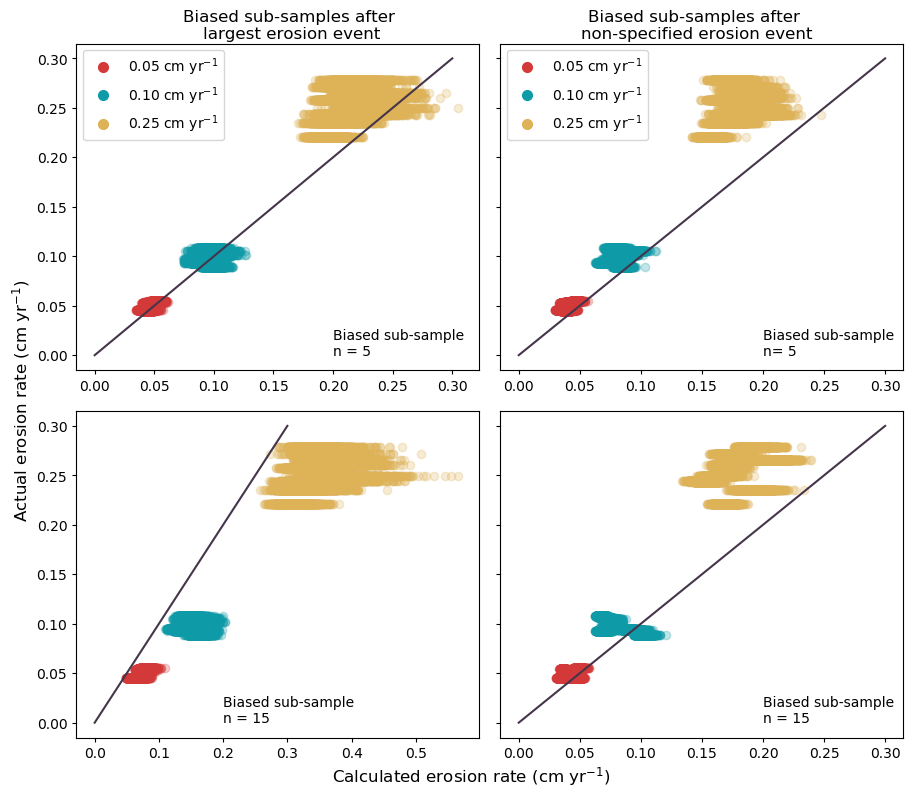

In [2474]:
'''
Plotting a 4-panel comparison of intentionally biased data.
'''

font = {'family' : 'sansserif'}

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, 
                                            figsize = (9,7.5),
                                              sharey = True,
                                           tight_layout = True)
[ax1.scatter(bias_measured_ER[0][k][:], actual_ERs[0], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[ax1.scatter(bias_measured_ER[1][k][:], actual_ERs[1], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[ax1.scatter(bias_measured_ER[2][k][:], actual_ERs[2],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
ax1.plot([0.0,0.30],[0.0,0.30], c = '#45354b')

ax1.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ ax1.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax1.text(0.2,0.0, 'Biased sub-sample \nn = 5', size = 10)
ax1.legend(handles=patches)

[ax2.scatter(rd_yr_bias_measured_ER[0][k][:], actual_ERs[0], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[ax2.scatter(rd_yr_bias_measured_ER[1][k][:], actual_ERs[1], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[ax2.scatter(rd_yr_bias_measured_ER[2][k][:], actual_ERs[2],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
ax2.plot([0.0,0.30],[0.0,0.30], c = '#45354b')

ax2.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ ax2.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax2.text(0.2,0.0, 'Biased sub-sample \nn= 5', size = 10)
ax2.legend(handles=patches)

[ax3.scatter(bias_15_measured_ER[0][k][:], actual_ERs[0], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[ax3.scatter(bias_15_measured_ER[1][k][:], actual_ERs[1], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[ax3.scatter(bias_15_measured_ER[2][k][:], actual_ERs[2],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
ax3.plot([0.0,0.30],[0.0,0.30], c = '#45354b')
ax3.text(0.20,0.0, 'Biased sub-sample \nn = 15', size = 10)
ax3.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

[ax4.scatter(rd_yr_15_bias_measured_ER[0][k][:], actual_ERs[0], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[ax4.scatter(rd_yr_15_bias_measured_ER[1][k][:], actual_ERs[1], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[ax4.scatter(rd_yr_15_bias_measured_ER[2][k][:], actual_ERs[2],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
ax4.plot([0.0,0.30],[0.0,0.30], c = '#45354b')
ax4.text(0.2,0.0, 'Biased sub-sample \nn = 15', size = 10)
ax4.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')


fig.text(0.00, 0.50, 'Actual erosion rate (cm yr$^{-1}$)', size=12,ha='center',
        va='center', rotation=90)
fig.text(0.30, 1.0, 'Biased sub-samples after \nlargest erosion event', size=12,ha='center',
        va='center')
fig.text(0.75, 1.0, 'Biased sub-samples after \nnon-specified erosion event', size=12,ha='center',
        va='center')
fig.text(0.5, 0.0, 'Calculated erosion rate (cm yr$^{-1}$)', size = 12, ha='center', va='center')

plt.savefig('D:/STEIN_paper/model_outputs/figures/intentionally_biased_ER_comparison.png', bbox_inches = 'tight',
            transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/intentionally_biased_ER_comparison.jpg',
           bbox_inches = 'tight')

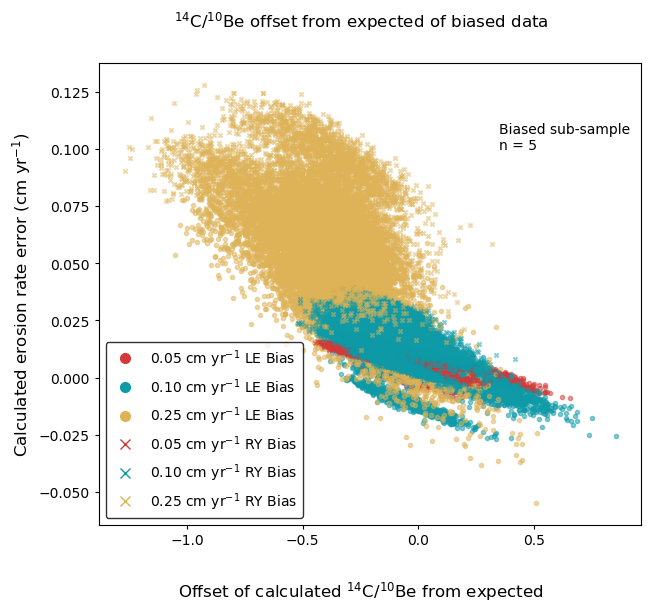

In [2477]:
font = {'family' : 'sansserif'}
fig, (ax1) = plt.subplots(ncols = 1, nrows = 1, figsize = (7, 6),
                              sharey = True)

ax1.set_ylabel('Calculated erosion rate error (cm yr$^{-1}$)', 
           fontdict = font,
           size = 12, color = 'black')

ax1.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

ax1.scatter(y = bias_ER_error[0][:][:], x = bias_C14_error[0][:][:], 
            c = '#d33938', alpha = 0.50, s = 9, 
            label = '0.05 cm yr$^{-1}$')
ax1.scatter(y = bias_ER_error[1][:][:], x = bias_C14_error[1][:][:], 
            c = '#0e9aa7', alpha = 0.50,s = 9, 
           label = '0.1 cm yr$^{-1}$')
ax1.scatter(y = bias_ER_error[2][:][:], x = bias_C14_error[2][:][:], 
            c = '#deb256', alpha = 0.50,s = 9, 
           label = '0.25 cm yr$^{-1}$')

ax1.scatter(y = rd_yr_bias_ER_error[0][:][:], x = rd_yr_bias_C14_error[0][:][:], 
            c = '#d33938', alpha = 0.50, s = 9, marker = 'x', 
            label = '0.05 cm yr$^{-1}$')
ax1.scatter(y = rd_yr_bias_ER_error[1][:][:], x = rd_yr_bias_C14_error[1][:][:], 
            c = '#0e9aa7', alpha = 0.50,s = 9, marker = 'x',
           label = '0.1 cm yr$^{-1}$')
ax1.scatter(y = rd_yr_bias_ER_error[2][:][:], x = rd_yr_bias_C14_error[2][:][:], 
            c = '#deb256', alpha = 0.50,s = 9, marker = 'x',
           label = '0.25 cm yr$^{-1}$')

patches = [ ax2.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

colors = ['#d33938','#0e9aa7', '#deb256',
         '#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$ LE Bias', '0.10 cm yr$^{-1}$ LE Bias', '0.25 cm yr$^{-1}$ LE Bias',
         '0.05 cm yr$^{-1}$ RY Bias', '0.10 cm yr$^{-1}$ RY Bias', '0.25 cm yr$^{-1}$ RY Bias']
markers = ["o","o","o",'x','x','x']
patches = [ ax1.plot([],[], marker = markers[i], ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

ax1.legend(handles=patches, edgecolor = 'black')

fig.text(0.5, 0.95, '$^{14}$C/$^{10}$Be offset from expected of biased data', 
         size = 12, ha='center', va='center')

fig.text(0.5, 0.0, 'Offset of calculated $^{14}$C/$^{10}$Be from expected', 
           fontdict = font, size = 12, color = 'black', ha='center', va='center')
plt.text(0.35, 0.10, 'Biased sub-sample \nn = 5')
plt.savefig('D:/STEIN_paper/model_outputs/figures/C14_10Be_vs_ER_with_biased_data.png',
            bbox_inches= 'tight', transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/C14_10Be_vs_ER_with_biased_data.jpg',
            bbox_inches= 'tight',)

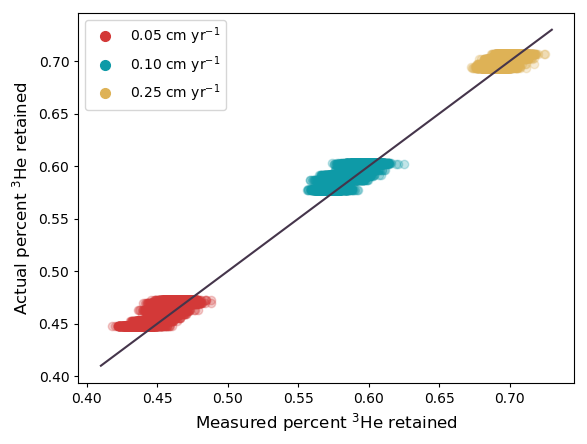

In [2513]:
font = {'family' : 'sansserif'}

[plt.scatter(measured_perc_1000[0][k][:], actual_means_list[0][4,:], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[plt.scatter(measured_perc_1000[1][k][:], actual_means_list[1][4], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[plt.scatter(measured_perc_1000[2][k][:], actual_means_list[2][4],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
plt.plot([0.41,0.73],[0.41,0.73], c = '#45354b')

plt.ylabel('Actual percent $^{3}$He retained', 
           fontdict = font,
           size = 12, color = 'black')
plt.xlabel('Measured percent $^{3}$He retained', 
           fontdict = font, size = 12, color = 'black')
plt.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.savefig('D:/STEIN_paper/model_outputs/figures/measured_vs_actual_He3.png',
           transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/measured_vs_actual_He3.jpg')



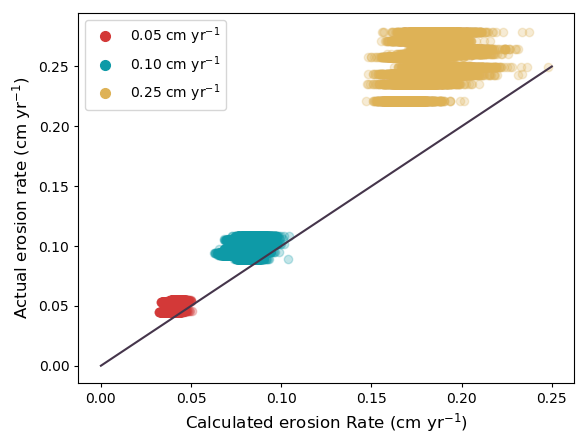

In [2434]:
font = {'family' : 'sansserif'}

[plt.scatter(measured_ER_1000[0][k][:], actual_ERs[0], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[plt.scatter(measured_ER_1000[1][k][:], actual_ERs[1], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[plt.scatter(measured_ER_1000[2][k][:], actual_ERs[2],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
plt.plot([0.0,0.25],[0.0,0.25], c = '#45354b')

plt.ylabel('Actual erosion rate (cm yr$^{-1}$)', 
           fontdict = font,
           size = 12, color = 'black')
plt.xlabel('Calculated erosion Rate (cm yr$^{-1}$)', 
           fontdict = font, size = 12, color = 'black')
plt.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.savefig('D:/STEIN_paper/model_outputs/figures/calculated_vs_actual_ERs.png',
           transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/calculated_vs_actual_ERs.jpg')

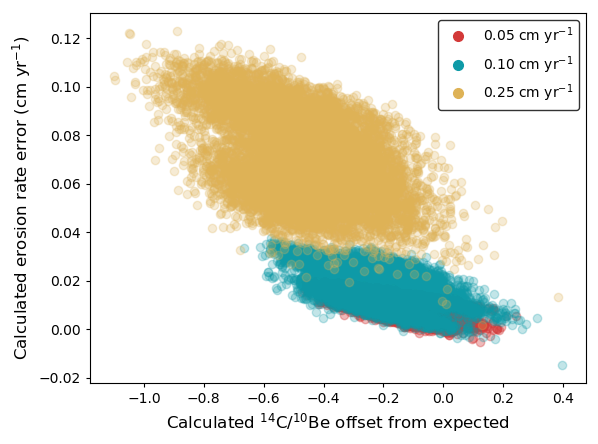

In [2516]:
font = {'family' : 'sansserif'}

plt.ylabel('Calculated erosion rate error (cm yr$^{-1}$)', 
           fontdict = font,
           size = 12, color = 'black')
plt.xlabel('Calculated $^{14}$C/$^{10}$Be offset from expected', 
           fontdict = font, size = 12, color = 'black')
plt.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')
# plt.ylim(-0.025,0.15)

plt.scatter(y = ER_error_1000[0][:][:], x = C14_error_1000[0][:][:], 
            c = '#d33938', alpha = 0.35, 
            label = '0.05 cm yr$^{-1}$')
plt.scatter(y = ER_error_1000[1][:][:], x = C14_error_1000[1][:][:], 
            c = '#0e9aa7', alpha = 0.25,
           label = '0.1 cm yr$^{-1}$')
plt.scatter(y = ER_error_1000[2][:][:], x = C14_error_1000[2][:][:], 
            c = '#deb256', alpha = 0.25,
           label = '0.25 cm yr$^{-1}$')

# plt.plot(regx, regy[0], c = '#c48c36') # individual regression lines
# plt.plot(regx, regy[1], c = '#255c6d') # ^^
# plt.plot(regx, regy[2], c = '#8b3b35')
# plt.plot(regx, non_liny)
# plt.plot(regx, all_reg_y, c = '#45354b', ls = '--')

# plt.text(-1.1, -0.01,
#         'Linear Regression: \nR$^{2}$ = ' + str('%.4f'%(all_dat_reg[2] **2)) + ' \np-value < 0.01 \nSt. Error = ' + str('%.4f'%(all_dat_reg[4])), 
#          bbox = dict(facecolor = 'white'))
plt.legend(edgecolor = 'black')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches, edgecolor = 'black')

plt.savefig('D:/STEIN_paper/model_outputs/figures/C14_Be10_ratio_ER_rate_error.png',
           transparent = True)
plt.savefig('D:/STEIN_paper/model_outputs/figures/C14_Be10_ratio_ER_rate_error.jpg')

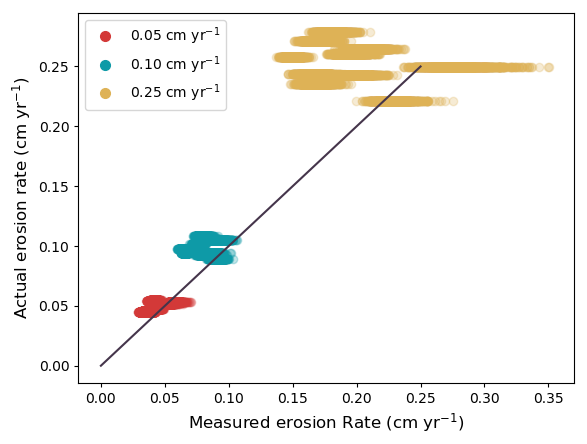

In [1804]:
font = {'family' : 'sansserif'}

[plt.scatter(rd_yr_bias_measured_ER[0][k][:], actual_ERs[0], 
             c = '#d33938', alpha = 0.25) for k in range(1000)]
[plt.scatter(rd_yr_bias_measured_ER[1][k][:], actual_ERs[1], 
             c = '#0e9aa7', alpha = 0.25) for k in range(1000)]
[plt.scatter(rd_yr_bias_measured_ER[2][k][:], actual_ERs[2],
             c = '#deb256', alpha = 0.25) for k in range(1000)]
plt.plot([0.0,0.25],[0.0,0.25], c = '#45354b')

plt.ylabel('Actual erosion rate (cm yr$^{-1}$)', 
           fontdict = font,
           size = 12, color = 'black')
plt.xlabel('Measured erosion Rate (cm yr$^{-1}$)', 
           fontdict = font, size = 12, color = 'black')
plt.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

# plt.savefig('D:/STEIN_paper/model_outputs/figures/measured_vs_actual_ERs.png',
#            transparent = True)
# plt.savefig('D:/STEIN_paper/model_outputs/figures/measured_vs_actual_ERs.jpg')

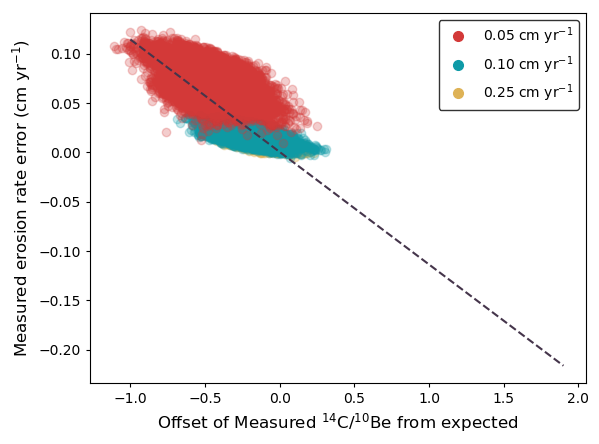

In [1710]:
font = {'family' : 'sansserif'}

plt.ylabel('Measured erosion rate error (cm yr$^{-1}$)', 
           fontdict = font,
           size = 12, color = 'black')
plt.xlabel('Offset of Measured $^{14}$C/$^{10}$Be from expected', 
           fontdict = font, size = 12, color = 'black')
plt.tick_params(size = 3, color = 'black', labelsize = 10, labelcolor = 'black')
# plt.ylim(-0.025,0.15)

plt.scatter(y = rd_yr_bias_ER_error[0][:][:], x = rd_yr_bias_C14_error[0][:][:], 
            c = '#deb256', alpha = 0.35, 
            label = '0.05 cm yr$^{-1}$')
plt.scatter(y = rd_yr_bias_ER_error[1][:][:], x = rd_yr_bias_C14_error[1][:][:], 
            c = '#0e9aa7', alpha = 0.25,
           label = '0.1 cm yr$^{-1}$')
plt.scatter(y = rd_yr_bias_ER_error[2][:][:], x = rd_yr_bias_C14_error[2][:][:], 
            c = '#d33938', alpha = 0.25,
           label = '0.25 cm yr$^{-1}$')

# plt.plot(regx, all_reg_y, c = '#45354b', ls = '--')
# plt.text(-1.1, -0.01,
#         'Linear Regression: \nR$^{2}$ = ' + str('%.4f'%(all_dat_reg[2] **2)) + ' \np-value < 0.01 \nSt. Error = ' + str('%.4f'%(all_dat_reg[4])), 
#          bbox = dict(facecolor = 'white'))
# plt.legend(edgecolor = 'black')

bias_regx = np.arange(-1, 2, 0.1)
bias_regy = (all_dat_reg[0] * bias_regx) + all_dat_reg[1]
plt.plot(bias_regx, bias_regy, c = '#45354b', ls = '--')

colors = ['#d33938','#0e9aa7', '#deb256']
texts = ['0.05 cm yr$^{-1}$', '0.10 cm yr$^{-1}$', '0.25 cm yr$^{-1}$']
patches = [ plt.plot([],[], marker="o", ms = 7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches, edgecolor = 'black')

# plt.savefig('D:/STEIN_paper/model_outputs/figures/C14_Be10_ratio_ER_rate_correction.png',
#            transparent = True)
# plt.savefig('D:/STEIN_paper/model_outputs/figures/C14_Be10_ratio_ER_rate_correction.jpg')

In [452]:
# measured_perc_list = [measured_percent05, measured_percent, measured_percent2]  
# measured_percent = np.divide(sampling_array[3,:], sampling_array[1,:]) * (P0_Be10 / P0_He3)
# measured_percent2 = np.divide(measured2[3,:], measured2[1,:]) * (P0_Be10 / P0_He3)
# measured_percent05 = np.divide(measured05[3,:], measured05[1,:]) * (P0_Be10 / P0_He3)

In [384]:
def import_dat(ERs_all):
    import_arrays = [np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(ERs_all[i]) + '.csv',
               delimiter = ',') for i in range(scenarios)]
    samples_import = [np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(np.mean(ERs_all[i])) + '.csv', 
               delimiter = ',') for i in range(scenarios)]

    samples_array = np.empty((sample_no, 5, scenarios))
    master_array = np.empty((total_time, 11, scenarios))

    for i in range(scenarios):
        samples_array[:,:,i] = samples_import[i]
        master_array[:,:,i] = import_arrays[i]

    sampling_array = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(ERs_all)) + '.csv',
                                  delimiter = ',') 
    
    return samples_array, master_array, sampling_array

In [384]:
def import_dat(ERs_all):
    import_arrays = [np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/comparison_output_' + str(ERs_all[i]) + '.csv',
               delimiter = ',') for i in range(scenarios)]
    samples_import = [np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/samples_output_' + str(np.mean(ERs_all[i])) + '.csv', 
               delimiter = ',') for i in range(scenarios)]

    samples_array = np.empty((sample_no, 5, scenarios))
    master_array = np.empty((total_time, 11, scenarios))

    for i in range(scenarios):
        samples_array[:,:,i] = samples_import[i]
        master_array[:,:,i] = import_arrays[i]

    sampling_array = np.genfromtxt('D:/STEIN_paper/model_outputs/stochastic_erosion/measured_output_' + str(np.mean(ERs_all)) + '.csv',
                                  delimiter = ',') 
    
    return samples_array, master_array, sampling_array